In [16]:
import os
os.chdir('../')
import xml.etree.ElementTree as ET
def read_Pascal_VOC(xml_file,do_0_based):
    # Pascal VOC is 1-based, but more recent formats like MS COCO are 0-based
    # see, e.g., https://github.com/Ricardozzf/maskrcnn-benchmark/commit/da8f99927eb945d3e66985d5e070fb55db472de6
    if do_0_based:
        to_subtract = 1
    else:
        to_subtract = 0
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes = dict()
    for box in root.iter('object'):
        name = box.find('name').text
        bb = box.find('bndbox')
        # dict to remove any ambiguity ordering-wise
        coords = dict(xmin = bb.find('xmin').text,
                      ymin = bb.find('ymin').text,
                      xmax = bb.find('xmax').text,
                      ymax = bb.find('ymax').text)
        coords = {k:int(v)-to_subtract for k,v in coords.items()}
        if name in boxes:
            boxes[name] = boxes[name] + [coords]
        else:
            boxes[name] = [coords]
    return boxes
gt_xml = read_Pascal_VOC('/Users/vvv/Code/Code_dev/Evaluation/data/sample_3/382.xml', False)
name = '382'

In [18]:
from ObjectDetectionMetrics.BoundingBoxes import *
from ObjectDetectionMetrics.utils import *
from ObjectDetectionMetrics.BoundingBox import *
import numpy as np
# Conver xml to boundingbox
gtBoundingBoxes = BoundingBoxes()
for k in gt_xml.keys():
    box_list = gt_xml[k]
    for coord_dict in box_list:
        gt_boundingBox = BoundingBox(
            imageName='382',
            classId=k,
            x=coord_dict['xmin'],
            y=coord_dict['ymin'],
            w=coord_dict['xmax'],
            h=coord_dict['ymax'],
            typeCoordinates=CoordinatesType.Absolute,
            bbType=BBType.GroundTruth,
            format=BBFormat.XYX2Y2)
        gtBoundingBoxes.addBoundingBox(gt_boundingBox)

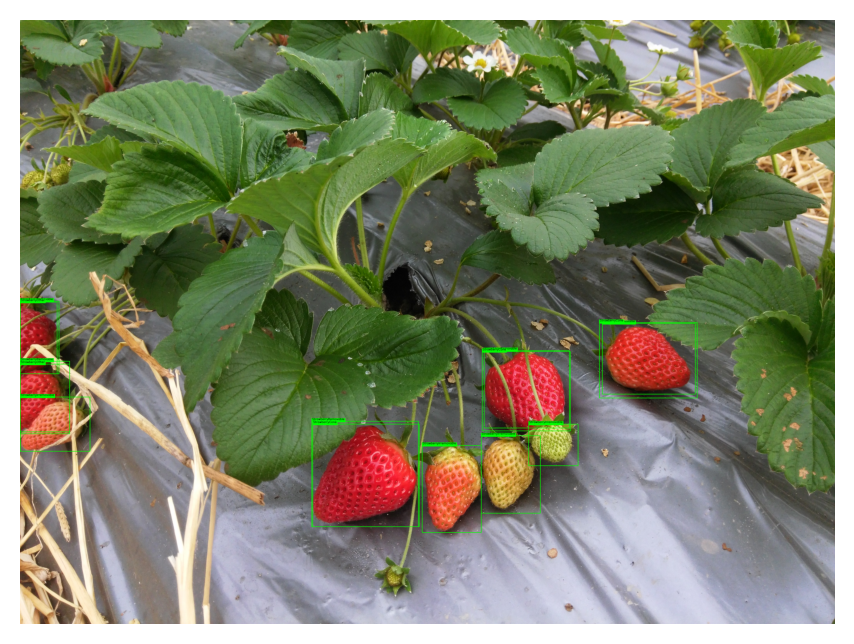

In [19]:
import cv2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, dpi=200)
im = cv2.imread('/Users/vvv/Code/Code_dev/Evaluation/data/sample_3/382.jpg')
im = gtBoundingBoxes.drawAllBoundingBoxes(im, '382', draw_label=True)
axes.axis('off')
axes.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [28]:
# Save in a txt with the same name
txt_path = f'/Users/vvv/Code/Code_dev/Evaluation/data/sample_3/{name}.txt'
with open(txt_path, 'w') as f:
    for k in gt_xml.keys():
        box_list = gt_xml[k]
        for coord_dict in box_list:
            # <class_name> <left> <top> <right> <bottom>
            f.write(f'{k} {coord_dict["xmin"]} {coord_dict["ymin"]} {coord_dict["xmax"]} {coord_dict["ymax"]}\n')